# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ls

CONTRIBUTING.md         heroes_information.csv  super_hero_powers.csv
LICENSE.md              index-lab-video.ipynb
README.md               index.ipynb


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [4]:
heroes_df.head(3)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


In [5]:
powers_df.head(3)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [6]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
heroes_df.head(3)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [8]:
heroes_df.shape, powers_df.shape

((734, 10), (667, 168))

In [9]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


There's two numerical columns (height and weight)

In [10]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [11]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [12]:
list(powers_df.columns)

['hero_names',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Trans

In [13]:
powers_df.describe() # most of them are booleans

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Alex Woolsly,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [14]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [15]:
powers_df.head(3) # you can see all the columns because of pd.set_option('display.max_columns', 500)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [16]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [17]:
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Rebellion              1
J. K. Rowling          1
Titan Books            1
Hanna-Barbera          1
South Park             1
J. R. R. Tolkien       1
Universal Studios      1
Microsoft              1
Name: Publisher, dtype: int64

In [18]:
heroes_df.isnull().sum() / len(heroes_df)

name          0.000000
Gender        0.000000
Eye color     0.000000
Race          0.000000
Hair color    0.000000
Height        0.000000
Publisher     0.020436
Skin color    0.000000
Alignment     0.000000
Weight        0.002725
dtype: float64

In [19]:
heroes_df.dropna(subset = ['Publisher'], inplace = True)

In [20]:
heroes_df.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [21]:
heroes_df.shape

(719, 10)

In [22]:
powers_df.isnull().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [23]:
powers_df.isnull().sum().sum() #no missing value

0

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [24]:
heroes_df.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


In [25]:
powers_df.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [26]:
df = heroes_df.merge(powers_df, left_on = 'name', right_on = 'hero_names', how = 'inner')

In the cell below, subset male and female heroes into different dataframes. Create a scatterplot of the height and weight of each hero, with weight as the y-axis. Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [27]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [28]:
plt.style.use('ggplot')
plt.xkcd() # the chart looks like hand writing

Text(0.5, 1.0, 'Female Superhero')

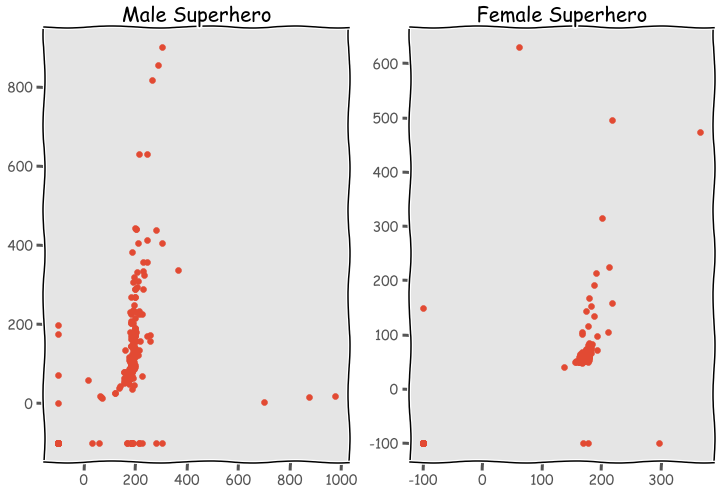

In [29]:
fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(df_male['Height'], df_male['Weight']) #height on the x axis and weight on the y axis
ax1.set_title('Male Superhero')

ax2 = plt.subplot(1, 2, 2)
plt.scatter(df_female['Height'], df_female['Weight']) #height on the x axis and weight on the y axis
ax2.set_title('Female Superhero')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [30]:
def show_displot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    plt.title(f'{gender} {column_name}')

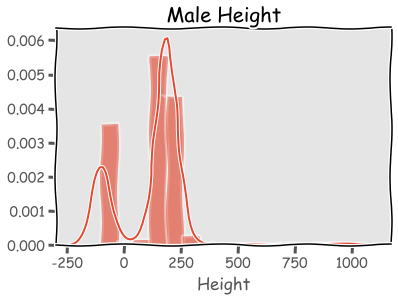

In [31]:
# Male Height
show_displot(df_male, 'Male', 'Height')

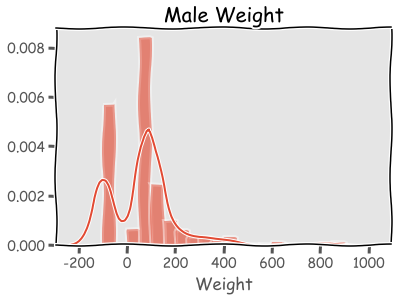

In [32]:
# Male Weight
show_displot(df_male, 'Male', 'Weight')

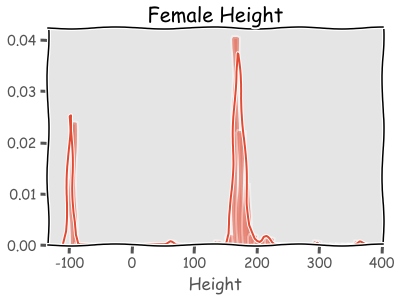

In [33]:
# Female Height
show_displot(df_female, 'Female', 'Height')

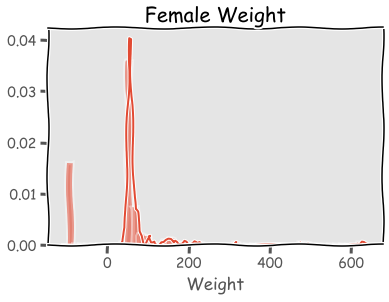

In [34]:
# Female Weight
show_displot(df_female, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [35]:
df_male.describe()

,Height,Weight
count,454.000000,454.000000
mean,119.106828,62.026432
std,140.761914,139.670550
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,183.000000,79.500000
75%,188.000000,101.000000
max,975.000000,900.000000


In [36]:
df_female.describe()

,Height,Weight
count,176.000000,176.000000
mean,114.088068,38.193182
std,116.008421,102.498040
min,-99.000000,-99.000000
25%,161.500000,49.000000
50%,168.000000,55.000000
75%,175.000000,61.000000
max,366.000000,630.000000


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [37]:
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,F

In [38]:
list(df.columns)[11:]

['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

In [39]:
powers_dict = {}
for x in list(df.columns)[11:]:
    powers_dict[x] = df[x].sum()

In [40]:
df['Accelerated Healing'].sum() #sanity check

181

In [41]:
powers_dict

{'Agility': 236,
 'Accelerated Healing': 181,
 'Lantern Power Ring': 11,
 'Dimensional Awareness': 25,
 'Cold Resistance': 49,
 'Durability': 256,
 'Stealth': 126,
 'Energy Absorption': 76,
 'Flight': 211,
 'Danger Sense': 33,
 'Underwater breathing': 23,
 'Marksmanship': 119,
 'Weapons Master': 103,
 'Power Augmentation': 8,
 'Animal Attributes': 26,
 'Longevity': 114,
 'Intelligence': 156,
 'Super Strength': 357,
 'Cryokinesis': 20,
 'Telepathy': 92,
 'Energy Armor': 8,
 'Energy Blasts': 146,
 'Duplication': 17,
 'Size Changing': 55,
 'Density Control': 15,
 'Stamina': 286,
 'Astral Travel': 4,
 'Audio Control': 8,
 'Dexterity': 6,
 'Omnitrix': 1,
 'Super Speed': 248,
 'Possession': 7,
 'Animal Oriented Powers': 41,
 'Weapon-based Powers': 60,
 'Electrokinesis': 20,
 'Darkforce Manipulation': 9,
 'Death Touch': 7,
 'Teleportation': 70,
 'Enhanced Senses': 91,
 'Telekinesis': 61,
 'Energy Beams': 41,
 'Magic': 44,
 'Hyperkinesis': 1,
 'Jump': 64,
 'Clairvoyance': 5,
 'Dimensional Trav

In [42]:
top_5_overall = sorted(powers_dict.items(), key = lambda kv: kv[1])[-5:] # sort dictionary by value python

In [43]:
#get first column of list of tuples python
power = [x[0] for x in top_5_overall]
count = [x[1] for x in top_5_overall]

Text(0.5, 1.0, 'Most Common Super Powers')

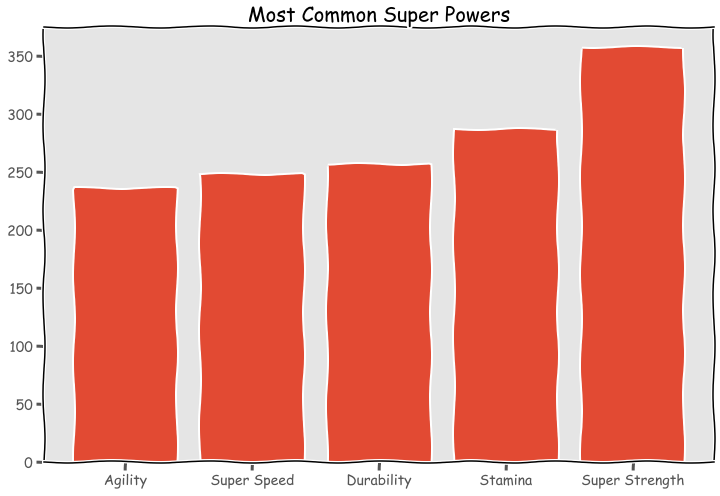

In [44]:
fig = plt.figure(figsize = (12, 8))
plt.bar(x = power, height = count)
plt.title('Most Common Super Powers')

In [45]:
df_marvel = df[df['Publisher'] == 'Marvel Comics']
df_marvel['Publisher'].value_counts() #sanity check

Marvel Comics    341
Name: Publisher, dtype: int64

In [46]:
powers_dict_marvel = {}
for x in list(df_marvel.columns)[11:]:
    powers_dict_marvel[x] = df_marvel[x].sum()

In [47]:
df_dc = df[df['Publisher'] == 'DC Comics']

In [48]:
powers_dict_dc = {}
for x in list(df_dc.columns)[11:]:
    powers_dict_dc[x] = df_dc[x].sum()

In [49]:
top_5_overall_marvel = sorted(powers_dict_marvel.items(), key = lambda kv: kv[1])[-5:]
top_5_overall_dc = sorted(powers_dict_dc.items(), key = lambda kv: kv[1])[-5:]

In [50]:
power_marvel = [x[0] for x in top_5_overall_marvel]
count_marvel = [x[1] for x in top_5_overall_marvel]

power_dc = [x[0] for x in top_5_overall_dc]
count_dc = [x[1] for x in top_5_overall_dc]

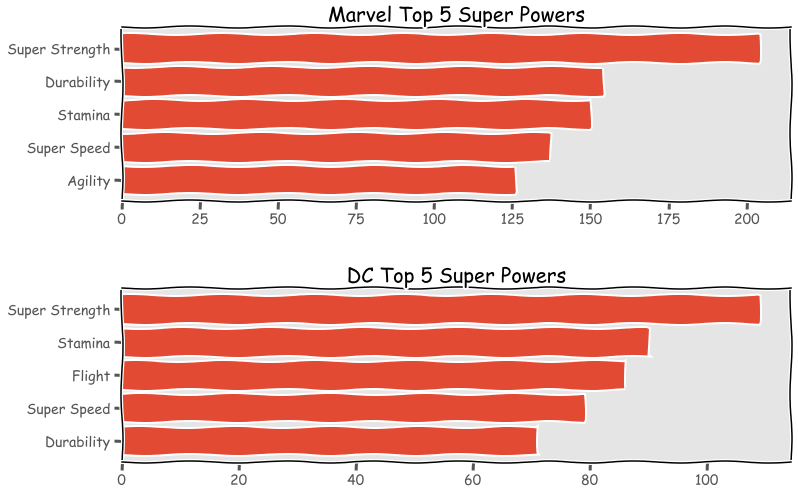

In [51]:
fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(2,1,1) #two rows, one column, the first one plot
ax1.barh(y = power_marvel, width = count_marvel)
ax1.set_title("Marvel Top 5 Super Powers")

ax2 = plt.subplot(2,1,2) #two rows, one column, the second one plot
ax2.barh(y = power_dc, width = count_dc)
ax2.set_title("DC Top 5 Super Powers")

# add space between subplots matplotlib
fig.subplots_adjust(hspace = 0.5)

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________




### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

# Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?

In [52]:
for x in list(df.columns)[11:]:
    print(x)

Agility
Accelerated Healing
Lantern Power Ring
Dimensional Awareness
Cold Resistance
Durability
Stealth
Energy Absorption
Flight
Danger Sense
Underwater breathing
Marksmanship
Weapons Master
Power Augmentation
Animal Attributes
Longevity
Intelligence
Super Strength
Cryokinesis
Telepathy
Energy Armor
Energy Blasts
Duplication
Size Changing
Density Control
Stamina
Astral Travel
Audio Control
Dexterity
Omnitrix
Super Speed
Possession
Animal Oriented Powers
Weapon-based Powers
Electrokinesis
Darkforce Manipulation
Death Touch
Teleportation
Enhanced Senses
Telekinesis
Energy Beams
Magic
Hyperkinesis
Jump
Clairvoyance
Dimensional Travel
Power Sense
Shapeshifting
Peak Human Condition
Immortality
Camouflage
Element Control
Phasing
Astral Projection
Electrical Transport
Fire Control
Projection
Summoning
Enhanced Memory
Reflexes
Invulnerability
Energy Constructs
Force Fields
Self-Sustenance
Anti-Gravity
Empathy
Power Nullifier
Radiation Control
Psionic Powers
Elasticity
Substance Secretion
Eleme

In [53]:
df_agility = df[df['Agility'] == True]

In [54]:
df_agility['Accelerated Healing'].sum() / len(df_agility)

0.4491525423728814

In [55]:
highest_percentage = 0
for x in list(df.columns)[11:]:
    if x != 'Agility':
        percent = df_agility[x].sum() / len(df_agility)
        if percent > highest_percentage:
            highest_percentage = percent
            print(x, percent)

Accelerated Healing 0.4491525423728814
Durability 0.4830508474576271
Super Strength 0.7033898305084746
Stamina 0.7330508474576272


In [56]:
highest_percentage = 0
for power in list(df.columns)[11:]:
    df_filter = df[df[power] == True]
    for x in list(df.columns)[11:]:
        if x != power:
            percent = df_filter[x].sum() / len(df_filter)
            if percent > highest_percentage:
                highest_percentage = percent
                print(power, x, percent)
            if percent == 1:
                print(power, x, percent)

Agility Accelerated Healing 0.4491525423728814
Agility Durability 0.4830508474576271
Agility Super Strength 0.7033898305084746
Agility Stamina 0.7330508474576272
Accelerated Healing Super Strength 0.8176795580110497
Lantern Power Ring Flight 0.8181818181818182
Dimensional Awareness Teleportation 0.84
Cold Resistance Durability 0.8571428571428571
Cold Resistance Super Strength 0.8775510204081632
Durability Super Strength 0.89453125
Underwater breathing Super Strength 0.9130434782608695
Astral Travel Flight 1.0
Astral Travel Flight 1.0
Dexterity Stamina 1.0
Omnitrix Shapeshifting 1.0
Death Touch Super Strength 1.0
Hyperkinesis Marksmanship 1.0
Hyperkinesis Spatial Awareness 1.0
Clairvoyance Intelligence 1.0
Clairvoyance Super Strength 1.0
Clairvoyance Invulnerability 1.0
Electrical Transport Super Speed 1.0
Electrical Transport Electrokinesis 1.0
Projection Psionic Powers 1.0
Anti-Gravity Durability 1.0
Anti-Gravity Longevity 1.0
Anti-Gravity Super Strength 1.0
Anti-Gravity Energy Blasts

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


Hair Manipulation Durability 1.0
Hair Manipulation Super Strength 1.0
Hair Manipulation Stamina 1.0
Hair Manipulation Super Speed 1.0
Hair Manipulation Telekinesis 1.0
Hair Manipulation Reflexes 1.0
Illumination Durability 1.0
Illumination Super Speed 1.0
Illumination Reflexes 1.0
Illumination Molecular Manipulation 1.0
Omnipotent Dimensional Awareness 1.0
Omnipotent Super Strength 1.0
Omnipotent Super Speed 1.0
Omnipotent Immortality 1.0
Omnipotent Invulnerability 1.0
Omnipotent Energy Manipulation 1.0
Omnipotent Reality Warping 1.0
Cloaking Stealth 1.0
Changing Armor Agility 1.0
Changing Armor Super Strength 1.0
Changing Armor Weapon-based Powers 1.0
Changing Armor Reflexes 1.0
Power Cosmic Flight 1.0
Power Cosmic Super Strength 1.0
Power Cosmic Super Speed 1.0
Biokinesis Agility 1.0
Biokinesis Accelerated Healing 1.0
Biokinesis Energy Absorption 1.0
Biokinesis Flight 1.0
Biokinesis Power Augmentation 1.0
Biokinesis Longevity 1.0
Biokinesis Super Strength 1.0
Biokinesis Telepathy 1.0

In [57]:
highest_percentage = 0
for power in list(df.columns)[11:]:
    df_filter = df[df[power] == True]
    for x in list(df.columns)[11:]:
        if x != power:
            percent = df_filter[x].sum()
            if percent > highest_percentage:
                highest_percentage = percent
                print(power, x, percent)

Agility Accelerated Healing 106
Agility Durability 114
Agility Super Strength 166
Agility Stamina 173
Durability Super Strength 229


In [58]:
highest_percentage = 0
for power in list(df.columns)[11:]:
    df_filter = df[(df[power] == True) & (df['Gender'] == 'Male')]
    for x in list(df.columns)[11:]:
        if x != power:
            percent = df_filter[x].sum() / len(df_filter)
            if percent > highest_percentage:
                highest_percentage = percent
                print(power, x, percent)

Agility Accelerated Healing 0.47023809523809523
Agility Durability 0.5178571428571429
Agility Super Strength 0.6964285714285714
Agility Stamina 0.7619047619047619
Accelerated Healing Super Strength 0.7971014492753623
Dimensional Awareness Teleportation 0.8571428571428571
Cold Resistance Durability 0.9166666666666666
Cold Resistance Super Strength 0.9444444444444444
Astral Travel Flight 1.0


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


In [59]:
highest_percentage = 0
for power in list(df.columns)[11:]:
    df_filter = df[(df[power] == True) & (df['Gender'] == 'Female')]
    for x in list(df.columns)[11:]:
        if x != power:
            percent = df_filter[x].sum() / len(df_filter)
            if percent > highest_percentage:
                highest_percentage = percent
                print(power, x, percent)

Agility Accelerated Healing 0.359375
Agility Durability 0.390625
Agility Stealth 0.40625
Agility Super Strength 0.703125
Accelerated Healing Super Strength 0.868421052631579
Lantern Power Ring Flight 1.0


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data